In [2]:
import metapypulation.subpopulation
import metapypulation.individual
from  metapypulation.simulation import Simulation
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from metapypulation.metapopulation import Metapopulation


In [2]:

# migrations = np.genfromtxt('./configs/island_model.csv', delimiter=',')

# migrations = migrations

metapop = Metapopulation(4, "axelrod_interaction", migration_matrix = 'island', carrying_capacities=1000)
metapop.populate()

In [3]:
metapop.migration_matrix

'island'

In [5]:
df_SS = pd.read_csv("./Outputs/stepping_stone.csv")
df_SS["means"] = df_SS.mean(axis=1)

df_IM = pd.read_csv("./Outputs/island.csv")
df_IM["means"] = df_IM.mean(axis=1)

Text(0.5, 0, 'Generations (x 1000)')

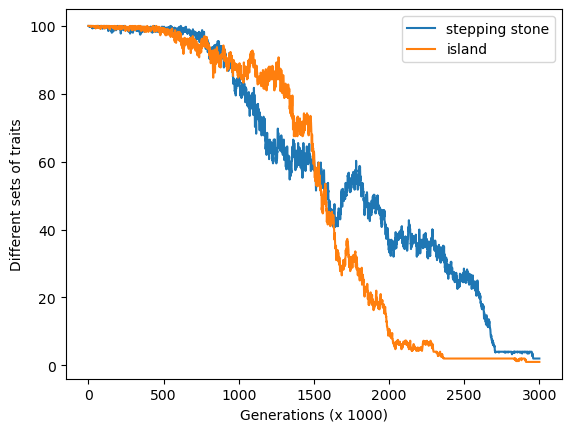

In [6]:
df_SS["means"].plot()
df_IM["means"].plot()
plt.legend(["stepping stone", "island"])
plt.ylabel("Different sets of traits")
plt.xlabel("Generations (x 1000)")

In [2]:
migrations = [[0., 0.001], [0.001, 0.]]
migrations = np.array(migrations)

migrations

array([[0.   , 0.001],
       [0.001, 0.   ]])

In [14]:
sim = Simulation(1000, 10, "stepping_stone", "axelrod_interaction", 100, 2, "test")

In [16]:
sim.migration_matrix

array([[0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001, 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.001,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   ,
        0.001],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001,
        0.   ]])

Text(0.5, 1.0, 'Number of unique sets')

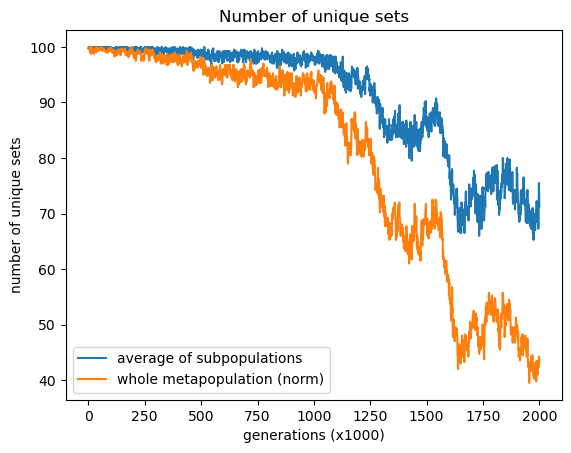

In [15]:
pd.concat([sim.subpop_set_counts, sim.metapop_set_counts/4], axis=1).plot()
plt.legend(["average of subpopulations", "whole metapopulation (norm)"])
plt.xlabel("generations (x1000)")
plt.ylabel("number of unique sets")
plt.title("Number of unique sets")

## Island model VS stepping stone model - 4 subpopulations

In [7]:
pop = 1000
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_set_counts.csv")#, index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_set_counts.csv")#, index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_set_counts.csv")#, index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_set_counts.csv")#, index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/4, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/4, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

# plt.fill_between(island_metapop_counts.index.values, 
#                  island_metapop_counts.mean(axis=1)/4-island_metapop_counts.std(axis=1)/4, 
#                  island_metapop_counts.mean(axis=1)/4+island_metapop_counts.std(axis=1)/4, alpha=0.8)
# plt.fill_between(island_subpop_counts.index.values, 
#                  island_subpop_counts.mean(axis=1)-island_subpop_counts.std(axis=1), 
#                  island_subpop_counts.mean(axis=1)+island_subpop_counts.std(axis=1), alpha=0.8)

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

FileNotFoundError: [Errno 2] No such file or directory: './Outputs/pop1000/island_model/4subpop_metapop_set_counts.csv'

Text(0.5, 1.0, 'Total population = 1000, subpopulations = 4')

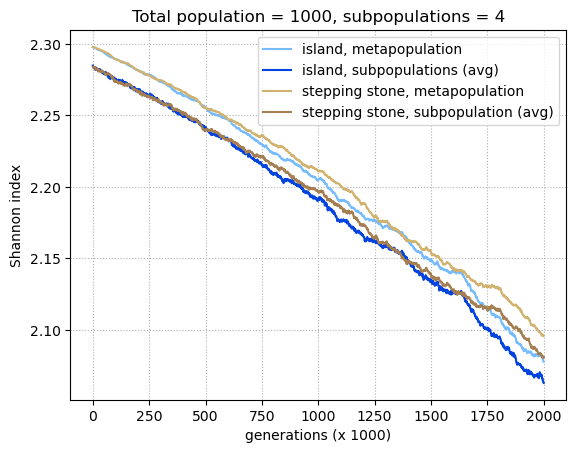

In [104]:
pop = 1000
island_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_metapop_shannon.csv")#, index_col=0)
stepping_metapop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_shannon.csv")#, index_col=0)
island_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/island_model/4subpop_subpop_shannon.csv")#, index_col=0)
stepping_subpop_shannon = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_subpop_shannon.csv")#, index_col=0)


for dataset in [island_metapop_shannon, stepping_metapop_shannon, island_subpop_shannon, stepping_subpop_shannon]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_shannon.mean(axis=1), color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_shannon.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_shannon.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_shannon.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("Shannon index")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, subpopulations = 4")

## 8 subpopulations

Text(0.5, 1.0, 'Total population = 400, 8 subpopulations')

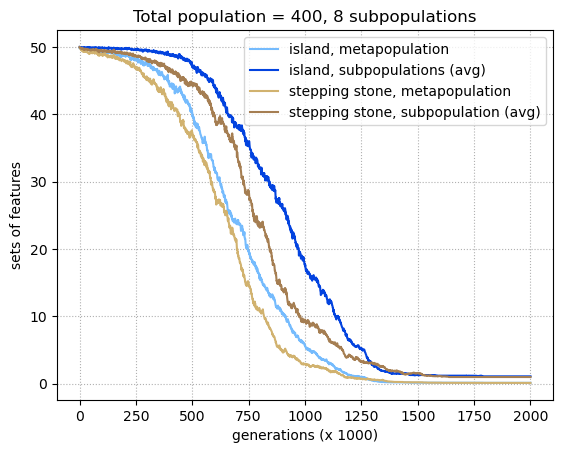

In [21]:
pop = 400
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_subpop_set_counts.csv", index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/8, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/8, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, 8 subpopulations")

Text(0.5, 1.0, 'Total population = 400, 8 subpopulations')

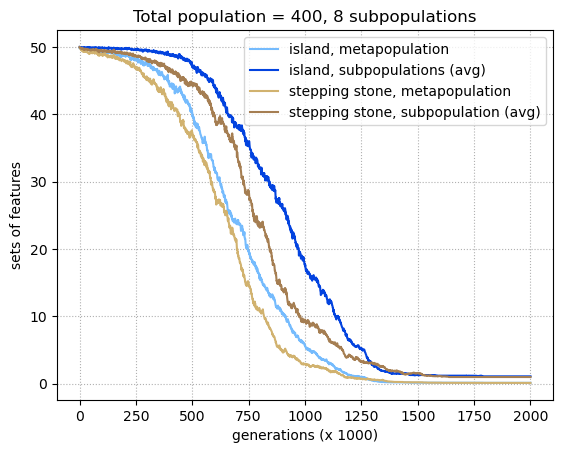

In [22]:
island_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)
stepping_subpop_counts = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_subpop_set_counts.csv", index_col=0)
#island_metapop_shannon = pd.read_csv("./Outputs/pop1000/island_model/4subpop_subpop_shannon.csv")
#stepping_metapop_shannon = pd.read_csv("./Outputs/pop1000/stepping_stone/4subpop_subpop_shannon.csv")

for dataset in [island_metapop_counts, stepping_metapop_counts, island_subpop_counts, stepping_subpop_counts]:
    dataset.index.names = ["generations"]
    dataset.columns.names = ["replicate"]
    
plt.plot(island_metapop_counts.mean(axis=1)/8, color='xkcd:sky blue', linestyle= '-')

plt.plot(island_subpop_counts.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts.mean(axis=1)/8, color='xkcd:tan', linestyle= '-')
plt.plot(stepping_subpop_counts.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, metapopulation', 'island, subpopulations (avg)', 
            'stepping stone, metapopulation', 'stepping stone, subpopulation (avg)'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, 8 subpopulations")

## Compare 4 to 8 subpopulations (for metapopulation of 400 people)

Text(0.5, 1.0, 'Total population = 400, island model')

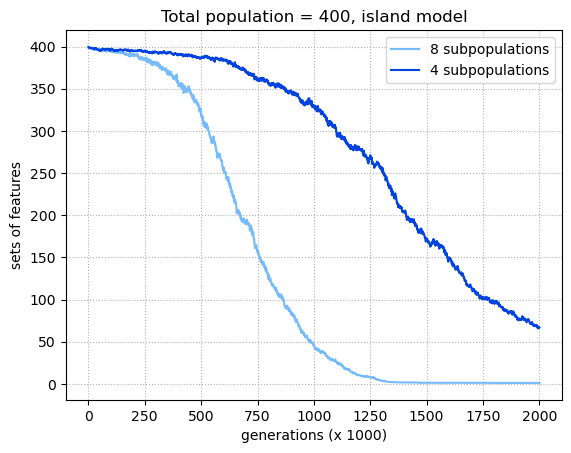

In [46]:
pop = 400
island_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
island_metapop_counts_4 = pd.read_csv(f"./Outputs/pop{pop}/island/4subpop_metapop_set_counts.csv", index_col=0)

plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:sky blue', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:blue', linestyle= '-')

plt.legend(['8 subpopulations', '4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, island model")

Text(0.5, 1.0, 'Total population = 400, stepping-stone model')

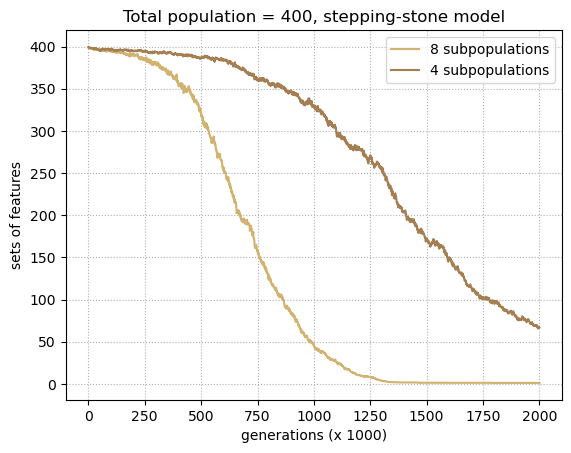

In [48]:
stepping_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/8subpop_metapop_set_counts.csv", index_col=0)
stepping_metapop_counts_4 = pd.read_csv(f"./Outputs/pop{pop}/stepping_stone/4subpop_metapop_set_counts.csv", index_col=0)

plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['8 subpopulations', '4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, stepping-stone model")

Text(0.5, 1.0, 'Total population = 400, comparison between models')

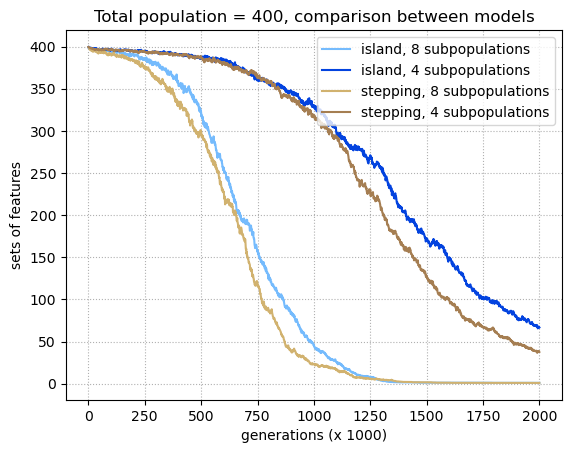

In [49]:
plt.plot(island_metapop_counts_8.mean(axis=1), color='xkcd:sky blue', linestyle= '-')
plt.plot(island_metapop_counts_4.mean(axis=1), color='xkcd:blue', linestyle= '-')
plt.plot(stepping_metapop_counts_8.mean(axis=1), color='xkcd:tan', linestyle= '-')
plt.plot(stepping_metapop_counts_4.mean(axis=1), color='xkcd:puce', linestyle= '-')

plt.legend(['island, 8 subpopulations', 'island, 4 subpopulations', 
            'stepping, 8 subpopulations', 'stepping, 4 subpopulations'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}, comparison between models")

In [52]:
island_metapop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts.csv", index_col=0)
island_subpop_counts_8 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_subpop_set_counts.csv", index_col=0)

In [53]:
island_subpop_counts_8

,1,2,3,4,5,6,7,8,9,10
0,50.0,50.000,50.000,50.000,50.000,50.000,50.000,50.000,50.00,50.0
1,50.0,50.000,50.000,50.000,50.000,50.000,49.875,50.000,50.00,50.0
2,50.0,50.000,50.000,50.000,49.875,49.750,50.000,50.000,49.75,50.0
3,50.0,49.875,50.000,50.000,49.875,49.875,50.000,49.875,50.00,50.0
4,50.0,50.000,49.875,49.875,50.000,50.000,49.875,50.000,50.00,50.0
...,...,...,...,...,...,...,...,...,...,...
1996,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1997,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1998,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0
1999,1.0,1.000,2.000,1.000,1.000,1.000,1.000,1.000,1.00,1.0


## Comparison with bigger migration rates

In [17]:
pop = 400
island_metapop_counts_m3 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_metapop_set_counts_m1e-3.csv", index_col=0)
island_metapop_counts_m2 = pd.read_csv(f"./Outputs/pop{pop}/island/8subpop_m1e-2_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Total population = 400')

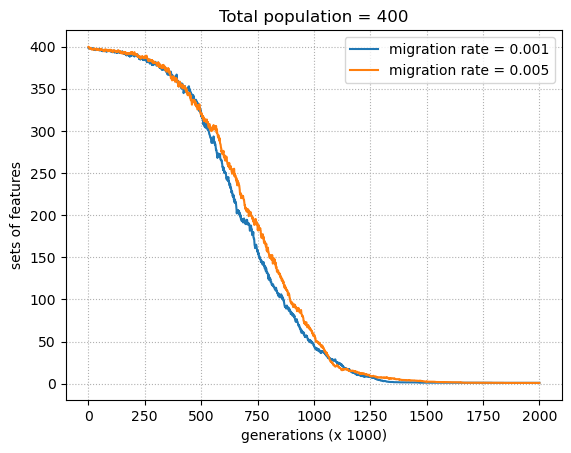

In [19]:
plt.plot(island_metapop_counts_m3.mean(axis=1))
plt.plot(island_metapop_counts_m2.mean(axis=1))

plt.legend(['migration rate = 0.001', 'migration rate = 0.005'])
plt.xlabel("generations (x 1000)")
plt.ylabel("sets of features")
plt.grid(linestyle = ':')
plt.title(f"Total population = {pop}")

## Test different sequences

In [7]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))

metapopulation = Metapopulation(4, "axelrod_interaction", migrations_zero)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
    
metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 11
The current number of sets in pop 1 is 43
The current number of sets in pop 2 is 37
The current number of sets in pop 3 is 22
Gen 100000!
The current number of sets in pop 0 is 1
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 1
The current number of sets in pop 3 is 1
Gen 150000!
The current number of sets in pop 0 is 7
The current number of sets in pop 1 is 6
The current number of sets in pop 2 is 7
The current number of sets in pop 3 is 7
Gen 200000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 2
The current number of sets in pop 2 is 2
The current number of sets in pop 3 is 2
Gen 250000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 2
The current number o

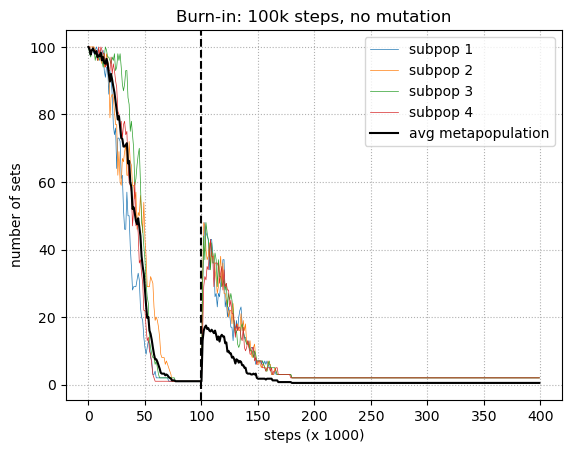

In [9]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop) / 4, linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", "avg metapopulation"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, no mutation")
plt.savefig("no_mutation_test.png")

## Comparison burn-in to no burn-in

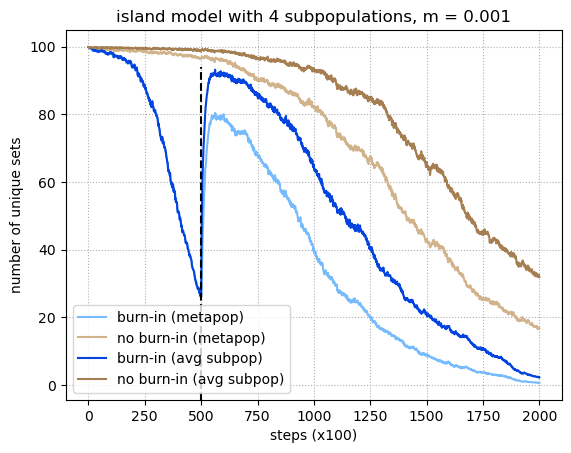

In [10]:
data_burnin_metapop = pd.read_csv('./Outputs/pop400/island/4subpop_m1e-3_burnin_metapop_set_counts.csv', index_col=0)
no_burnin_metapop = pd.read_csv('./Outputs/pop400/island/4subpop_metapop_set_counts_m1e-3.csv', index_col=0)
data_burnin_subpop = pd.read_csv('./Outputs/pop400/island/4subpop_m1e-3_burnin_subpop_set_counts.csv', index_col=0)
no_burnin_subpop = pd.read_csv('./Outputs/pop400/island/4subpop_subpop_set_counts_m1e-3.csv', index_col=0)

plt.plot(data_burnin_metapop.mean(axis=1) / 4, color = 'xkcd:sky blue')
plt.plot(no_burnin_metapop.mean(axis=1) / 4, color = 'tan')
plt.plot(data_burnin_subpop.mean(axis=1), color = 'xkcd:blue')
plt.plot(no_burnin_subpop.mean(axis=1), color = 'xkcd:puce')
plt.grid(linestyle=':')
plt.axvline(500, color="black", linestyle='--', ymax=0.9)
plt.xlabel("steps (x100)")
plt.ylabel("number of unique sets")
plt.title("island model with 4 subpopulations, m = 0.001")
plt.legend(['burn-in (metapop)', 'no burn-in (metapop)', 'burn-in (avg subpop)', 'no burn-in (avg subpop)'])

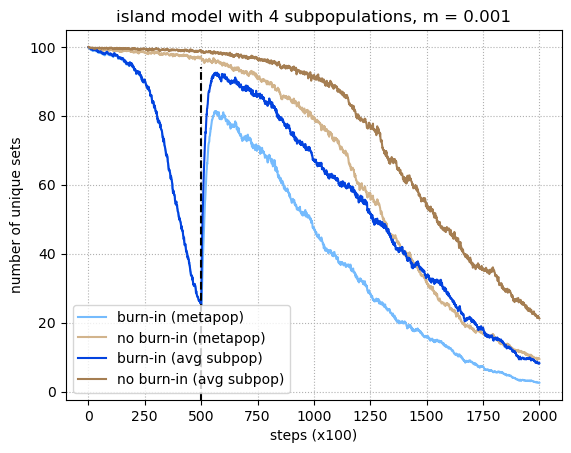

In [98]:
data_burnin_metapop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_m1e-3_burnin_metapop_set_counts.csv', index_col=0)
no_burnin_metapop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_metapop_set_counts.csv', index_col=0)
data_burnin_subpop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_m1e-3_burnin_subpop_set_counts.csv', index_col=0)
no_burnin_subpop = pd.read_csv('./Outputs/pop400/stepping_stone/4subpop_subpop_set_counts.csv', index_col=0)

plt.plot(data_burnin_metapop.mean(axis=1) / 4, color = 'xkcd:sky blue')
plt.plot(no_burnin_metapop.mean(axis=1) / 4, color = 'tan')
plt.plot(data_burnin_subpop.mean(axis=1), color = 'xkcd:blue')
plt.plot(no_burnin_subpop.mean(axis=1), color = 'xkcd:puce')
plt.grid(linestyle=':')
plt.axvline(500, color="black", linestyle='--', ymax=0.9)
plt.xlabel("steps (x100)")
plt.ylabel("number of unique sets")
plt.title("island model with 4 subpopulations, m = 0.001")
plt.legend(['burn-in (metapop)', 'no burn-in (metapop)', 'burn-in (avg subpop)', 'no burn-in (avg subpop)'])

## Periodic shut down of migration

In [18]:
migrations = np.genfromtxt('./configs/stepping_stone_8pop.csv', delimiter=',') * 100

metapopulation = Metapopulation(8, "axelrod_interaction", migrations)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_pop_5 = []
counts_pop_6 = []
counts_pop_7 = []
counts_pop_8 = []
counts_metapop = []

measure_timing = 1000
verbose_timing = 50000

burn_in = 30000
epoch = 50000
cycle_repetitions = 3

total_time = burn_in + 2*cycle_repetitions*epoch + epoch

for t in range(burn_in):
    if t%measure_timing == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%verbose_timing == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")


    metapopulation.make_interact()

for repetition in range(cycle_repetitions):
    current_time = t
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()
        
    current_time = t    
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        # metapopulation.migrate()
        metapopulation.make_interact()

current_time = t
for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
The current number of sets in pop 4 is 100
The current number of sets in pop 5 is 100
The current number of sets in pop 6 is 100
The current number of sets in pop 7 is 100
Gen 80000!
The current number of sets in pop 0 is 137
The current number of sets in pop 1 is 125
The current number of sets in pop 2 is 129
The current number of sets in pop 3 is 99
The current number of sets in pop 4 is 103
The current number of sets in pop 5 is 62
The current number of sets in pop 6 is 78
The current number of sets in pop 7 is 66
Gen 130000!
The current number of sets in pop 0 is 121
The current number of sets in pop 1 is 104
The current number of sets in pop 2 is 128
The current number of sets in pop 3 is 98
The current number of sets in pop 4 is 72
The current number of sets in pop 5 is 6
The current number of sets in po

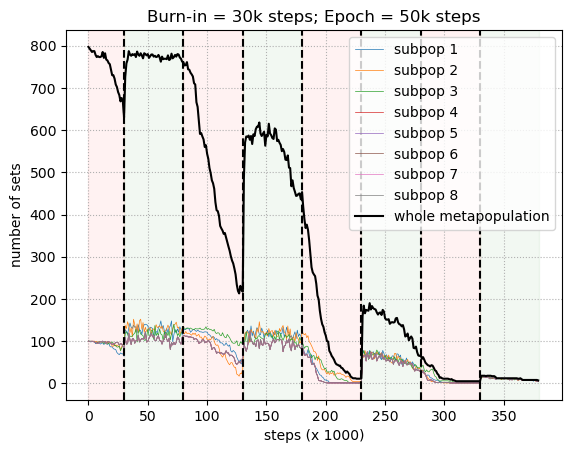

In [19]:
plt.plot(range(int(total_time / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_5, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_6, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_7, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_8, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
for i in range(1, 2*cycle_repetitions + 1):
    plt.axvline(x = (burn_in + i*epoch)/1000, linestyle="--", color = "black")

plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", 
            "subpop 5", "subpop 6", "subpop 7", "subpop 8", "whole metapopulation"])
plt.title(f"Burn-in = {int(burn_in/1000)}k steps; Epoch = {int(epoch/1000)}k steps")

plt.axvspan(0, 30, color = 'red', alpha = 0.05)
for i in range(0, 2*cycle_repetitions + 1):
    if i%2 == 0:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'green', alpha = 0.05)
    else:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'red', alpha = 0.05)

plt.savefig("on-off-no_mut.png")

## Neutral VS Axelrod (stepping stone)

In [17]:
data_axelrod_local = pd.read_csv("./Outputs/pop400/stepping_stone/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/pop400/stepping_stone/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/stepping_stone/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/stepping_stone/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Stepping stone model')

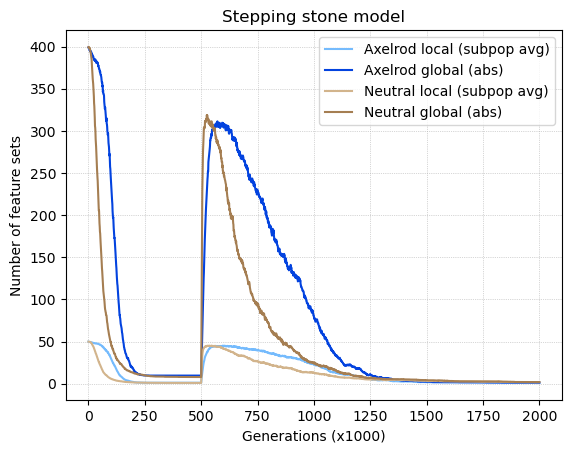

In [18]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Axelrod local (subpop avg)", "Axelrod global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Stepping stone model")
#plt.legend(["Axelrod local", "Neutral local"])

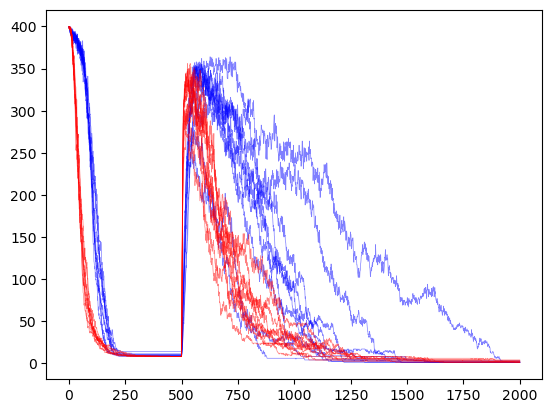

In [5]:
plt.plot(data_axelrod_global, c = "blue", alpha=0.5, linewidth=0.5)
plt.plot(data_neutral_global, c = "red", alpha=0.5, linewidth=0.5)

## Neutral VS Axelrod (Island)

In [13]:
data_axelrod_local = pd.read_csv("./Outputs/pop400/island/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/pop400/island/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/island/8subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/island/8subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Island model')

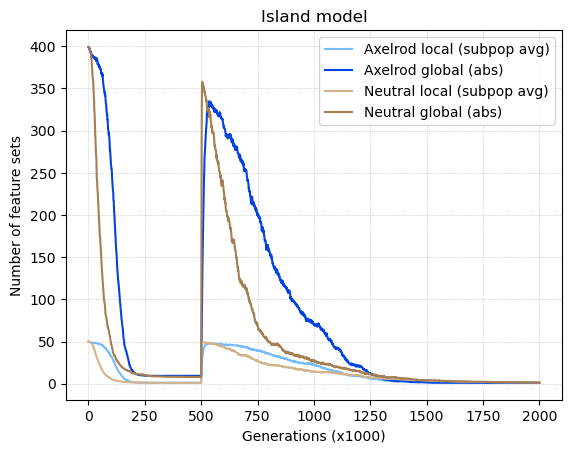

In [16]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Axelrod local (subpop avg)", "Axelrod global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Island model")

In [18]:
import pandas as pd
data_axelrod_local = pd.read_csv("./Outputs/TAG2024/01-neutral-axelrod/4subpop_island_axelrod_interaction_metapop_set_counts.csv", index_col=0)
data_axelrod_global = pd.read_csv("./Outputs/TAG2024/01-neutral-axelrod/8subpop_island_axelrod_interaction_metapop_set_counts.csv", index_col=0)
data_neutral_local = pd.read_csv("./Outputs/neutral/pop400/island/4subpop_m1e-3_burnin_subpop_set_counts.csv", index_col=0)
data_neutral_global = pd.read_csv("./Outputs/neutral/pop400/island/4subpop_m1e-3_burnin_metapop_set_counts.csv", index_col=0)

Text(0.5, 1.0, 'Island model')

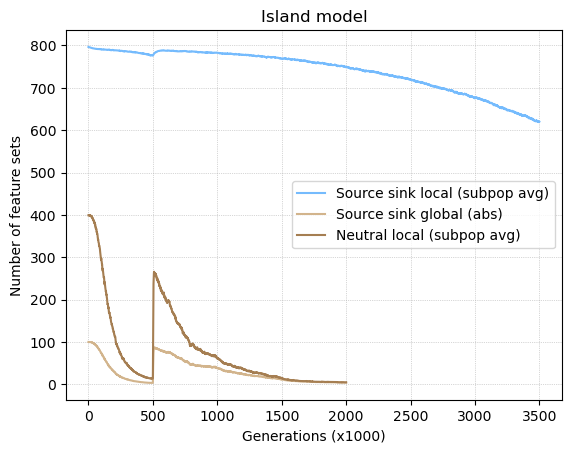

In [21]:
plt.plot(data_axelrod_local.mean(axis=1), color = 'xkcd:sky blue')
#plt.plot(data_axelrod_global.mean(axis=1), color = 'xkcd:blue')
plt.plot(data_neutral_local.mean(axis=1), color = 'tan')
plt.plot(data_neutral_global.mean(axis=1), color = 'xkcd:puce')
plt.legend(["Source sink local (subpop avg)", "Source sink global (abs)", "Neutral local (subpop avg)", "Neutral global (abs)"])
plt.ylabel("Number of feature sets")
plt.xlabel("Generations (x1000)")
plt.grid(linestyle=':', linewidth=0.5)
plt.title("Island model")

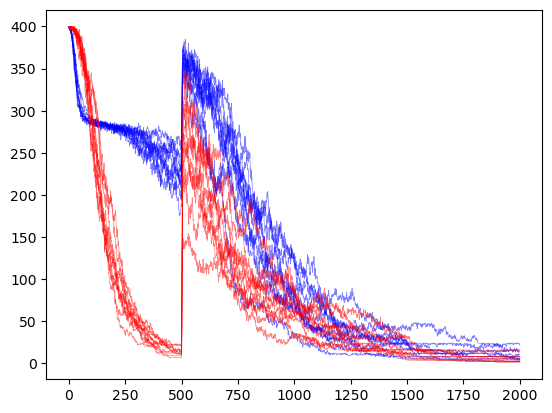

In [27]:
plt.plot(data_axelrod_global, c = "blue", alpha=0.5, linewidth=0.5)
plt.plot(data_neutral_global, c = "red", alpha=0.5, linewidth=0.5)

In [13]:
data_axelrod_local.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000],
      dtype='int64', length=2001)

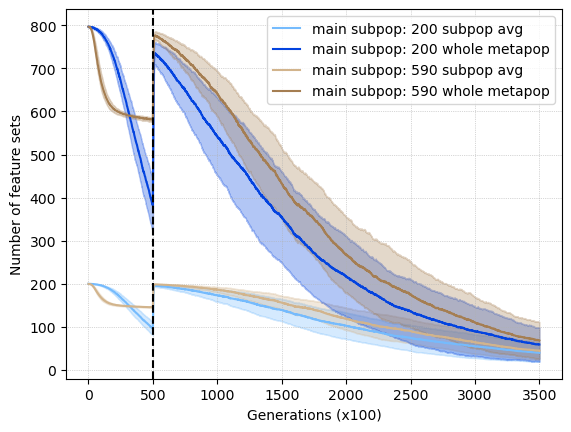

In [20]:
from plotting import plot_comparison, metapopulation_plot_comparison
plot_comparison('./Outputs/TAG2024/01-neutral-axelrod/4subpop_island_neutral_interaction', './Outputs/TAG2024/03-source-sink/4subpop_island_neutral_interaction_590', 
                None, 'main subpop: 200', 'main subpop: 590', './Outputs/TAG2024/03-source-sink/neutral_very_large_imbalance.png')

#plot_comparison('./Outputs/SourceSink/pop400/island/4subpop_m1e-3_burnin_283', './Outputs/neutral/pop400/island/4subpop_m1e-3_burnin', 
#                'Source sink (Largest pop 283)', 'Source-sink', 'Symmetric', './Outputs/source-sink_w-std.png')

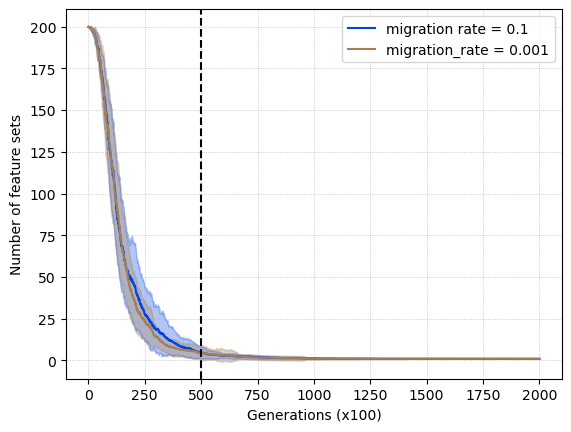

In [3]:

from plotting import plot_comparison, metapopulation_plot_comparison

# metapopulation_plot_comparison('./Outputs/TAG2024/04-migration-rates/4subpop_island_axelrod_interaction_m0.01', 
#                                './Outputs/TAG2024/01-neutral-axelrod/4subpop_island_axelrod_interaction', 
#                                './Outputs/TAG2024/04-migration-rates/4subpop_island_axelrod_interaction_m0.0001',
#                                None, 'migration rate = 0.01', 'migration_rate = 0.001', 'migration_rate = 0.0001',
#                                './Outputs/TAG2024/04-migration-rates/4subpop_island_neutral_migration_rates.png')


metapopulation_plot_comparison(dataset_1 = './Outputs/4subpop_popsize[50, 50, 50, 50]_island_neutral_interaction_0.1_noburnin', 
                               dataset_2 = './Outputs/4subpop_popsize[50, 50, 50, 50]_island_neutral_interaction_0.001_noburnin', 
                               title = None, legend_1 = 'migration rate = 0.1', legend_2 = 'migration_rate = 0.001',
                               output_file = './Outputs/TAG2024/04-migration-rates/noburnin_migration_rates_4subpops.png')

In [9]:
from metapypulation.simulation import Simulation
simulation = Simulation(100, 
                        4, 
                        'island', 
                        'neutral_interaction',
                        100,
                        1,
                        f"./Outputs/test",
                        0,
                        0.01)
                        

array([[0.  , 0.01, 0.01, 0.01],
       [0.01, 0.  , 0.01, 0.01],
       [0.01, 0.01, 0.  , 0.01],
       [0.01, 0.01, 0.01, 0.  ]])

In [8]:
simulation.metapop

AttributeError: 'Simulation' object has no attribute 'metapopulation'

In [16]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))

metapopulation = Metapopulation(4, "axelrod_interaction", migrations_zero, mutation_rate = 0.001)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
    
metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 56
The current number of sets in pop 2 is 45
The current number of sets in pop 3 is 6
Gen 100000!
The current number of sets in pop 0 is 1
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 1
The current number of sets in pop 3 is 1
Gen 150000!
The current number of sets in pop 0 is 19
The current number of sets in pop 1 is 26
The current number of sets in pop 2 is 26
The current number of sets in pop 3 is 25
Gen 200000!
The current number of sets in pop 0 is 11
The current number of sets in pop 1 is 15
The current number of sets in pop 2 is 13
The current number of sets in pop 3 is 9
Gen 250000!
The current number of sets in pop 0 is 4
The current number of sets in pop 1 is 4
The current num

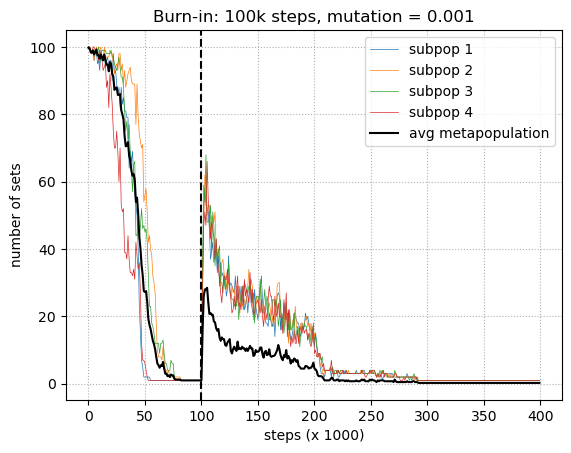

In [17]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop) / 4, linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", "avg metapopulation"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, mutation = 0.001")
plt.savefig("mutation10e-3_test.png")

In [22]:
migrations = np.genfromtxt('./configs/stepping_stone_8pop.csv', delimiter=',') * 100

metapopulation = Metapopulation(8, "axelrod_interaction", migrations, mutation_rate = 0.001)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_pop_5 = []
counts_pop_6 = []
counts_pop_7 = []
counts_pop_8 = []
counts_metapop = []

measure_timing = 1000
verbose_timing = 50000

burn_in = 30000
epoch = 50000
cycle_repetitions = 3

total_time = burn_in + 2*cycle_repetitions*epoch + epoch

for t in range(burn_in):
    if t%measure_timing == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
        counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
        counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
        counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
        counts_metapop.append(metapopulation.metapopulation_test_sets())
    if t%verbose_timing == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")


    metapopulation.make_interact()

for repetition in range(cycle_repetitions):
    current_time = t
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()
        
    current_time = t    
    for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        # metapopulation.migrate()
        metapopulation.make_interact()

current_time = t
for t in range(current_time, current_time + epoch + 1):
        if t%measure_timing == 0:
            counts_pop_1.append(metapopulation.subpopulations[0].count_traits_sets())
            counts_pop_2.append(metapopulation.subpopulations[1].count_traits_sets())
            counts_pop_3.append(metapopulation.subpopulations[2].count_traits_sets())
            counts_pop_4.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_5.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_6.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_7.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_pop_8.append(metapopulation.subpopulations[3].count_traits_sets())
            counts_metapop.append(metapopulation.metapopulation_test_sets())
        if t%verbose_timing == 0:
            print(f"Gen {t + burn_in}!")
            for subpopulation in metapopulation.subpopulations:
                print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
                
        metapopulation.migrate()
        metapopulation.make_interact()

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 99
The current number of sets in pop 3 is 100
The current number of sets in pop 4 is 100
The current number of sets in pop 5 is 100
The current number of sets in pop 6 is 99
The current number of sets in pop 7 is 100
Gen 80000!
The current number of sets in pop 0 is 138
The current number of sets in pop 1 is 140
The current number of sets in pop 2 is 98
The current number of sets in pop 3 is 84
The current number of sets in pop 4 is 86
The current number of sets in pop 5 is 102
The current number of sets in pop 6 is 91
The current number of sets in pop 7 is 58
Gen 130000!
The current number of sets in pop 0 is 117
The current number of sets in pop 1 is 119
The current number of sets in pop 2 is 89
The current number of sets in pop 3 is 49
The current number of sets in pop 4 is 53
The current number of sets in pop 5 is 79
The current number of sets in pop 6

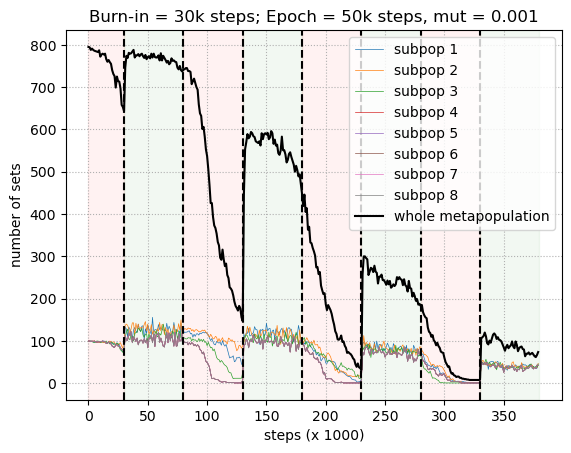

In [23]:
plt.plot(range(int(total_time / 1000)), counts_pop_1, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_2, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_3, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_4, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_5, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_6, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_7, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), counts_pop_8, linewidth=0.5)
plt.plot(range(int(total_time / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
for i in range(1, 2*cycle_repetitions + 1):
    plt.axvline(x = (burn_in + i*epoch)/1000, linestyle="--", color = "black")

plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("number of sets")
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", 
            "subpop 5", "subpop 6", "subpop 7", "subpop 8", "whole metapopulation"])
plt.title(f"Burn-in = {int(burn_in/1000)}k steps; Epoch = {int(epoch/1000)}k steps, mut = 0.001")

plt.axvspan(0, 30, color = 'red', alpha = 0.05)
for i in range(0, 2*cycle_repetitions + 1):
    if i%2 == 0:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'green', alpha = 0.05)
    else:
        plt.axvspan((burn_in + i*epoch) / 1000, (burn_in + (i + 1)*epoch) / 1000, color = 'red', alpha = 0.05)

plt.savefig("on-off-mut10e-3.png")

In [11]:
migrations = np.genfromtxt('./configs/stepping_stone_4pop.csv', delimiter=',')

migrations_zero = np.zeros((4,4))
mutation_rate = 0.0001
metapopulation = Metapopulation(4, "neutral_interaction", migrations_zero, mutation_rate = mutation_rate)
metapopulation.populate()

counts_pop_1 = []
counts_pop_2 = []
counts_pop_3 = []
counts_pop_4 = []
counts_metapop = []

burn_in = 100000
simulation_time = 300000
for t in range(burn_in):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].gini_diversity())
        counts_pop_2.append(metapopulation.subpopulations[1].gini_diversity())
        counts_pop_3.append(metapopulation.subpopulations[2].gini_diversity())
        counts_pop_4.append(metapopulation.subpopulations[3].gini_diversity())
        counts_metapop.append(metapopulation.metapopulation_gini())
    if t%50000 == 0:
        print(f"Gen {t}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            
    
    metapopulation.migrate()
    metapopulation.make_interact()
spread = metapopulation.count_origin_id_spread()
print(spread)  

metapopulation.migration_matrix = migrations
for t in range(simulation_time):
    if t%1000 == 0:
        counts_pop_1.append(metapopulation.subpopulations[0].gini_diversity())
        counts_pop_2.append(metapopulation.subpopulations[1].gini_diversity())
        counts_pop_3.append(metapopulation.subpopulations[2].gini_diversity())
        counts_pop_4.append(metapopulation.subpopulations[3].gini_diversity())
        counts_metapop.append(metapopulation.metapopulation_gini())
    if t%50000 == 0:
        print(f"Gen {t + burn_in}!")
        for subpopulation in metapopulation.subpopulations:
            print(f"The current number of sets in pop {subpopulation.id} is {subpopulation.count_traits_sets()}")
            # sub_id = []
            # for ind in subpopulation.population.individuals:
            #     sub_id.append(ind.original_deme_id)
            # indexes, counts = np.unique(sub_id, return_counts=True)
            # print(f"The current deme index present in population {subpopulation.id} are {indexes} with {counts} counts.")
    
    metapopulation.migrate()
    metapopulation.make_interact()

spread = metapopulation.count_origin_id_spread()
print(spread)

Gen 0!
The current number of sets in pop 0 is 100
The current number of sets in pop 1 is 100
The current number of sets in pop 2 is 100
The current number of sets in pop 3 is 100
Gen 50000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 8
The current number of sets in pop 3 is 6
[[100   0   0   0]
 [  0 100   0   0]
 [  0   0 100   0]
 [  0   0   0 100]]
Gen 100000!
The current number of sets in pop 0 is 2
The current number of sets in pop 1 is 1
The current number of sets in pop 2 is 3
The current number of sets in pop 3 is 1
Gen 150000!
The current number of sets in pop 0 is 49
The current number of sets in pop 1 is 42
The current number of sets in pop 2 is 39
The current number of sets in pop 3 is 33
Gen 200000!
The current number of sets in pop 0 is 15
The current number of sets in pop 1 is 16
The current number of sets in pop 2 is 16
The current number of sets in pop 3 is 15
Gen 250000!
The current number of

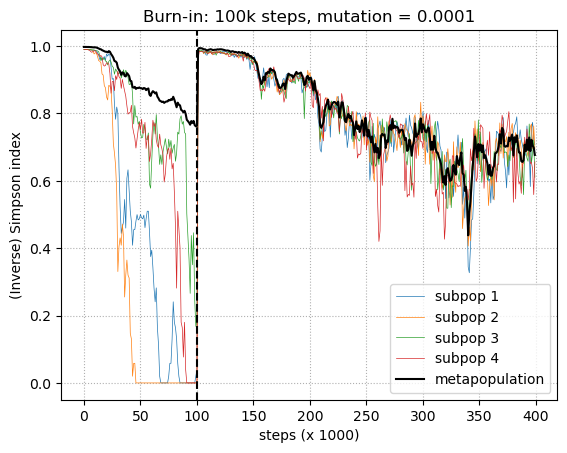

In [12]:
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_pop_1), linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_pop_2), linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_pop_3), linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_pop_4), linewidth=0.5)
plt.plot(range(int((burn_in + simulation_time) / 1000)), np.array(counts_metapop), linewidth=1.5, color="black")
plt.axvline(x = burn_in/1000, linestyle="--", color = "black")
plt.grid(linestyle=":")
plt.xlabel("steps (x 1000)")
plt.ylabel("(Inverse) Simpson index")
#plt.ylim(0, 400)
plt.legend(["subpop 1", "subpop 2", "subpop 3", "subpop 4", "metapopulation"])
plt.title(f"Burn-in: {int(burn_in/1000)}k steps, mutation = {mutation_rate}")
plt.savefig("./Outputs/simpson_neutral_test.png")

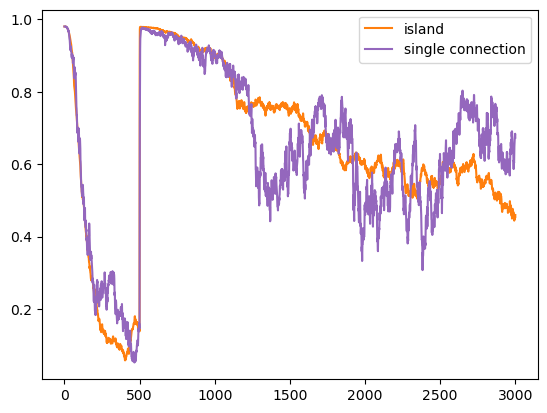

In [23]:
data_island = pd.read_csv("./Outputs/Kiel2025/island/neutral_interaction_0.001_subpop_gini.csv", index_col=0)
data_single = pd.read_csv("./Outputs/Kiel2025/singleConnection/neutral_interaction_0.001_subpop_gini.csv", index_col=0)

plt.plot(data_island.mean(axis=1), color="tab:orange")
plt.plot(data_single.mean(axis=1), color="tab:purple")
plt.legend(["island", "single connection"])

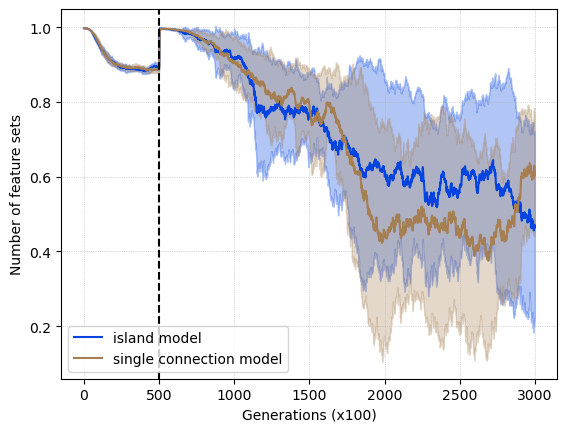

In [11]:
from plotting import plot_comparison_gini, plot_comparison_set_counts, metapopulation_plot_comparison

metapopulation_plot_comparison(dataset_1 = './Outputs/Kiel2025/island/neutral_interaction_0.001', 
                               dataset_2 = './Outputs/Kiel2025/singleConnection/neutral_interaction_0.001', 
                               title = None, legend_1 = 'island model', legend_2 = 'single connection model',
                               output_file = './Outputs/Kiel2025/test.png', what_measure = "gini")

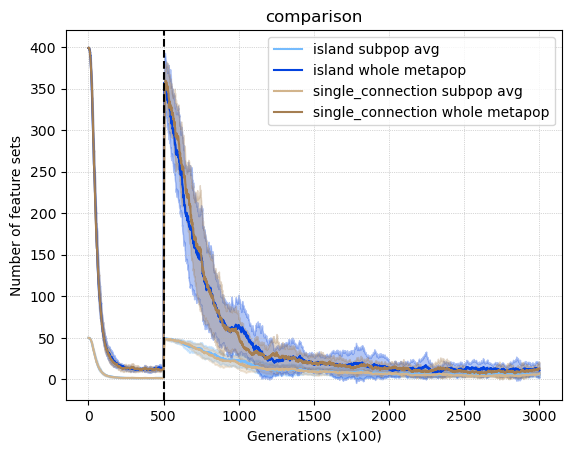

In [16]:
plot_comparison_set_counts("./Outputs/Kiel2025/island/neutral_interaction_0.001", "./Outputs/Kiel2025/frontConnection/neutral_interaction_0.001", 
"comparison", "island", "single_connection", "./Outputs/Kiel2025_comparison_test.png")

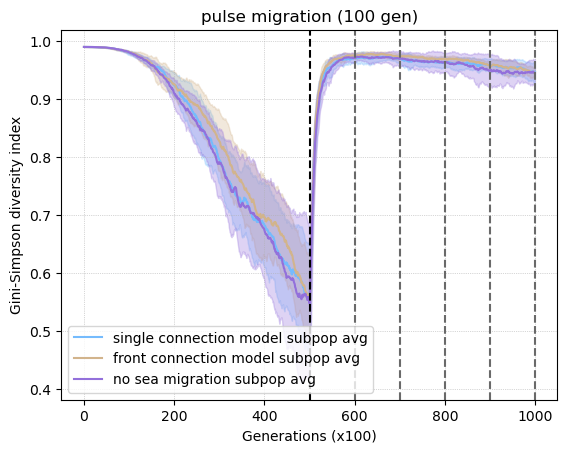

In [8]:
from plotting import plot_comparison_gini_pulses
plot_comparison_gini_pulses("./Outputs/Kiel2025/singleConnection/neutral_interaction_0.0001_5pulses_100gen", 
                            "./Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_100gen",  
                            "pulse migration (100 gen)", "single connection model", "front connection model", 5, 10, 90, 
                            "./Outputs/Kiel2025_comparison_neutral_shapes_continuous_stepping-stone.png",
                            dataset_3 = "./Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_0gen",
                            legend_3 = "no sea migration")

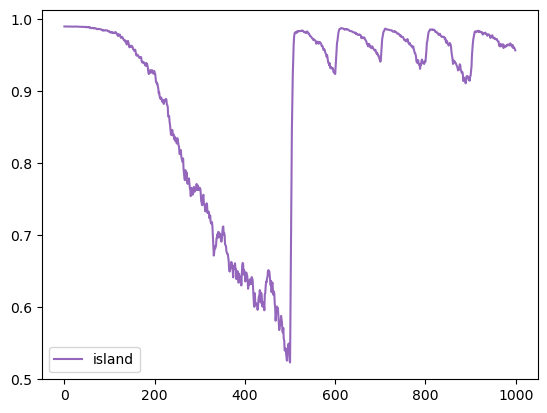

In [6]:
data = pd.read_csv("test.csv", index_col=0)
#data_single = pd.read_csv("./Outputs/Kiel2025/singleConnection/neutral_interaction_0.001_subpop_gini.csv", index_col=0)

#plt.plot(data_island.mean(axis=1), color="tab:orange")
plt.plot(data.mean(axis=1), color="tab:purple")
plt.legend(["island", "single connection"])

<Axes: >

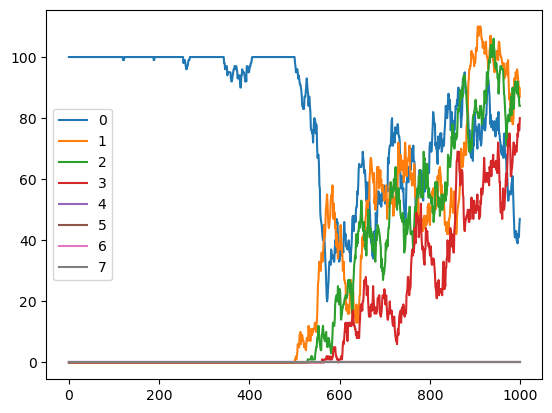

In [ ]:
data = pd.read_csv("./Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_0gen_extra_traits.csv", index_col=0)

data[data["Replicate"] == 1].loc[:, data.columns!="Replicate"]

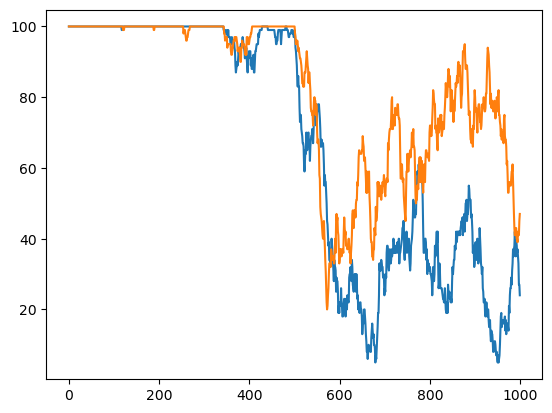

In [80]:
plt.plot(data[data["Replicate"] == 0]["0"])
plt.plot(data[data["Replicate"] == 1]["0"])

In [221]:
def plot_subpopulation_mean(dataset, subpop_id, output_file, number_of_pulses = 5, length_of_pulses = 1, settling_period = 99):
    # deme = pd.Series(dataset[dataset["Replicate"] == 0][f"{subpop_id}"])
    for replicate in dataset["Replicate"].unique():
        if replicate == 0:
            deme = pd.Series(dataset[dataset["Replicate"] == replicate][f"{subpop_id}"])

        deme = pd.concat([deme, pd.Series(dataset[dataset["Replicate"] == replicate][f"{subpop_id}"])], axis=1)

    fig = plt.plot(deme.mean(axis=1), color="tab:orange")
    std_plus = deme.mean(axis=1) + deme.std(axis=1)
    std_minus = deme.mean(axis=1) - deme.std(axis=1)
    # std_plus cannot be larger than 100 in the beginning (but values can as it can be below 0 and this is a symetric +/-!)
    std_plus[std_plus > 100] = 100
    std_minus[std_minus < 0] = 0
    plt.fill_between(deme.index, std_minus, std_plus, alpha = 0.3, color="tab:orange")
    plt.ylabel("Individuals with extra trait")
    plt.xlabel("Generations (x100)")
    plt.ylim([0, 100])
    plt.grid(linestyle=':', linewidth=0.5)
    plt.title(f"Extra trait in subpopulation {subpop_id}")
    
    plt.axvline(500, color="black", linestyle='--', ymax=1)
    for i in range(1, number_of_pulses + 1):
        plt.axvline(500 + i*(length_of_pulses + settling_period), color="dimgrey", linestyle='--', ymax=1)

    plt.savefig(output_file)
    
    return fig, deme


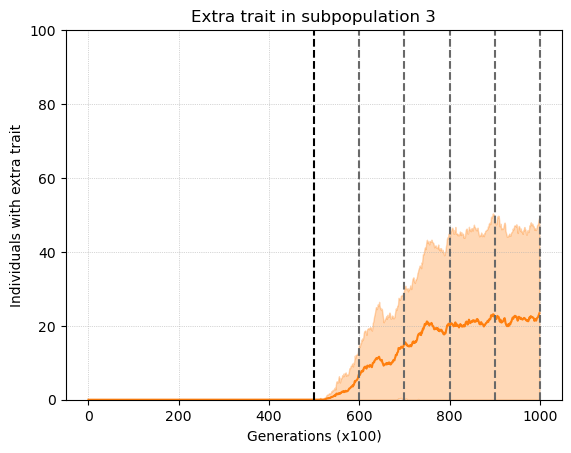

In [230]:
deme_id = 3
pulse_length = 100
data = pd.read_csv("./Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_100gen_extra_traits.csv", index_col=0)
figure, deme0 = plot_subpopulation_mean(data, deme_id, f"./Outputs/Kiel2025/counts_extra_trait_deme{deme_id}_{pulse_length}gen.png")


In [10]:
def plot_subpopulation_mean_dataset_comparison(dataset_1, dataset_2, subpop_id, output_file, label_1, label_2, ylim = 100, number_of_pulses = 5, length_of_pulses = 1, settling_period = 99):
    
    for replicate in dataset_1["Replicate"].unique():
        if replicate == 0:
            deme1 = pd.Series(dataset_1[dataset_1["Replicate"] == replicate][f"{subpop_id}"])
            deme2 = pd.Series(dataset_2[dataset_2["Replicate"] == replicate][f"{subpop_id}"])

        deme1 = pd.concat([deme1, pd.Series(dataset_1[dataset_1["Replicate"] == replicate][f"{subpop_id}"])], axis=1)
        deme2 = pd.concat([deme2, pd.Series(dataset_2[dataset_1["Replicate"] == replicate][f"{subpop_id}"])], axis=1)

    fig = plt.plot(deme1.mean(axis=1), color="xkcd:sky blue")
    plt.plot(deme2.mean(axis=1), color="tan")
    std_plus_1 = deme1.mean(axis=1) + deme1.std(axis=1)
    std_minus_1 = deme1.mean(axis=1) - deme1.std(axis=1)
    std_plus_2 = deme2.mean(axis=1) + deme2.std(axis=1)
    std_minus_2 = deme2.mean(axis=1) - deme2.std(axis=1)
    # std_plus cannot be larger than 100 in the beginning (but values can as it can be below 0 and this is a symetric +/-!)
    std_plus_1[std_plus_1 > 100] = 100
    std_minus_1[std_minus_1 < 0] = 0
    std_plus_2[std_plus_2 > 100] = 100
    std_minus_2[std_minus_2 < 0] = 0
    plt.fill_between(deme1.index, std_minus_1, std_plus_1, alpha = 0.3, color="xkcd:sky blue")
    plt.fill_between(deme2.index, std_minus_2, std_plus_2, alpha = 0.3, color="tan")
    plt.ylabel("Individuals with extra trait")
    plt.xlabel("Steps (x100)")
    plt.ylim([0, ylim])
    plt.grid(linestyle=':', linewidth=0.5)
    plt.title(f"Extra trait in subpopulation {subpop_id + 1}")
    plt.legend([label_1, label_2])
    
    plt.axvline(500, color="black", linestyle='--', ymax=1)
    for i in range(1, number_of_pulses + 1):
        plt.axvline(500 + i*(length_of_pulses + settling_period), color="dimgrey", linestyle='--', ymax=1)

    plt.savefig(output_file)
    
    return deme1, deme2

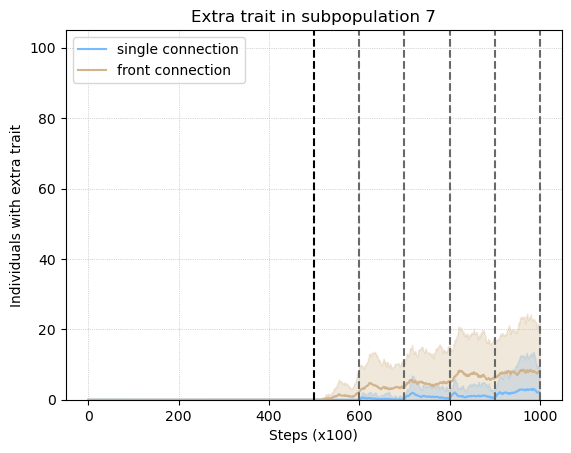

In [19]:
deme_id = 6
data_1 = pd.read_csv("./Outputs/Kiel2025/singleConnection/neutral_interaction_0.0001_5pulses_1000gen_extra_traits.csv", index_col=0)
data_2 = pd.read_csv("./Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_1000gen_extra_traits.csv", index_col=0)
deme_data_1, deme_data_2 = plot_subpopulation_mean_dataset_comparison(data_1, data_2, deme_id, f"./Outputs/Kiel2025/neutral_comparison_deme{deme_id}_1000", 
                                                                      "single connection", "front connection", ylim = 105)

In [1]:
from plotting import metapopulation_plot_comparison, plot_comparison_gini, plot_comparison_set_counts, subpopulation_plot_comparison

# metapopulation_plot_comparison(dataset_1 = './Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_100gen', 
#                                dataset_2 = './Outputs/Kiel2025/singleConnection/neutral_interaction_0.0001_5pulses_100gen', 
#                                title = None, legend_1 = 'front connection', legend_2 = 'single connection',
#                                output_file = './Outputs/Kiel2025/beta_diversity.png', what_measure = "gini",
#                                dataset_3 = './Outputs/Kiel2025/frontConnection/neutral_interaction_0.0001_5pulses_0gen',
#                                legend_3 = 'no sea migration')

In [3]:
measure = 'shannon'
model = 'front'
dataset1 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_0gen'
dataset2 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_1000gen'
dataset3 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_5000gen'

output_name =  f'./Outputs/Kiel2025/{measure}_pulses_{model}.png'
metapopulation_plot_comparison(dataset_1 = dataset1, 
                               dataset_2 = dataset2, 
                               title = '', legend_1 = 'no sea migration', legend_2 = '1000 steps',
                               output_file = output_name, what_measure = measure,
                               dataset_3 = dataset3,
                               legend_3 = '5000 steps')

UnboundLocalError: cannot access local variable 'dataset_1_global' where it is not associated with a value

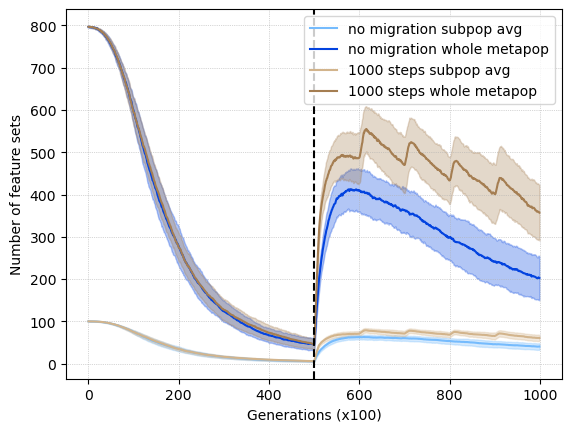

In [9]:
plot_comparison_set_counts(f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_0gen', 
                     f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_1000gen',
                     '', 'no migration', '1000 steps', 'test.png')

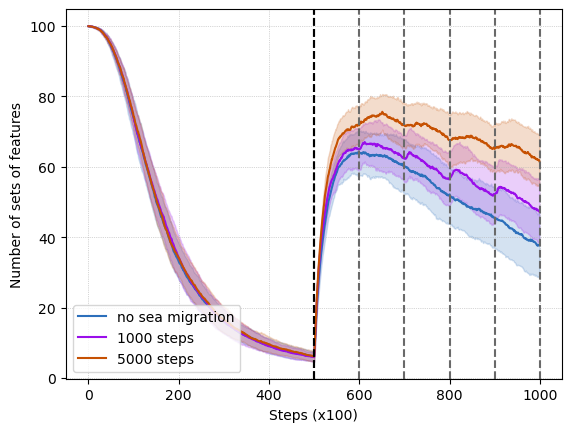

In [7]:
measure = 'set_counts'
model = 'single'
dataset1 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_0gen'
dataset2 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_1000gen'
dataset3 = f'./Outputs/Kiel2025/{model}Connection/neutral_interaction_0.0001_5pulses_5000gen'

output_name =  f'./Outputs/Kiel2025/{measure}_pulses_{model}_subpops.png'

subpopulation_plot_comparison(dataset_1 = dataset1, 
                              dataset_2 = dataset2, 
                              title = '', legend_1 = 'no sea migration', legend_2 = '1000 steps',
                              output_file = output_name, what_measure = measure,
                              dataset_3 = dataset3,
                              legend_3 = '5000 steps')

### Play with MDS

In [3]:
import sklearn.manifold
data = pd.read_csv("2_end.csv")

In [4]:
data

,subpop_id,feature_01_2,feature_01_3,feature_01_5,feature_01_6,feature_01_7,feature_01_9,feature_02_1,feature_02_2,feature_02_3,...,feature_04_2,feature_04_3,feature_04_4,feature_04_5,feature_04_6,feature_05_1,feature_05_2,feature_05_5,feature_05_7,feature_05_9
0,0,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
1,0,False,False,False,True,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
2,0,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
3,0,False,False,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
4,0,False,False,False,True,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,7,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
796,7,False,True,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
797,7,False,True,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
798,7,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [5]:
data_features = data.loc[:, data.columns != "subpop_id"]

In [47]:
nmds = sklearn.manifold.MDS(n_components=2, metric=True)

In [48]:
npos = nmds.fit(data_features).embedding_

In [49]:
import matplotlib
colors = matplotlib.color_sequences["tab10"]

In [50]:
list_of_colors = []
for i in data["subpop_id"]:
    list_of_colors.append(colors[i])

import matplotlib.lines as mlines

subpop1 = mlines.Line2D([], [], color=colors[0], marker='s', ls='', label='subpop 1')
subpop2 = mlines.Line2D([], [], color=colors[1], marker='s', ls='', label='subpop 2')
subpop3 = mlines.Line2D([], [], color=colors[2], marker='s', ls='', label='subpop 3')
subpop4 = mlines.Line2D([], [], color=colors[3], marker='s', ls='', label='subpop 4')
subpop5 = mlines.Line2D([], [], color=colors[4], marker='s', ls='', label='subpop 5')
subpop6 = mlines.Line2D([], [], color=colors[5], marker='s', ls='', label='subpop 6')
subpop7 = mlines.Line2D([], [], color=colors[6], marker='s', ls='', label='subpop 7')
subpop8 = mlines.Line2D([], [], color=colors[7], marker='s', ls='', label='subpop 8')
# etc etc


Text(0.5, 1.0, 'Single connection')

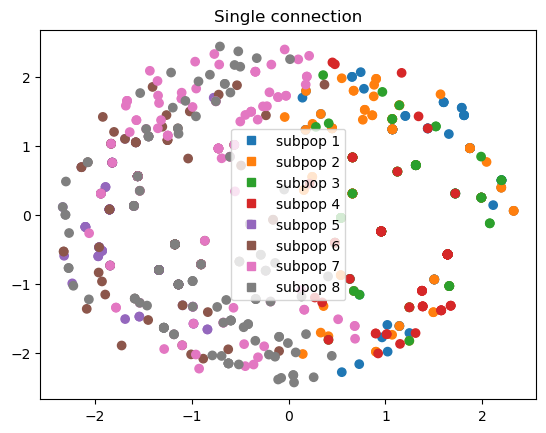

In [51]:
plt.scatter(npos[:,0], npos[:,1], color=list_of_colors)
plt.legend(handles=[subpop1,subpop2,subpop3,subpop4,subpop5,subpop6,subpop7,subpop8])
plt.title("Single connection")

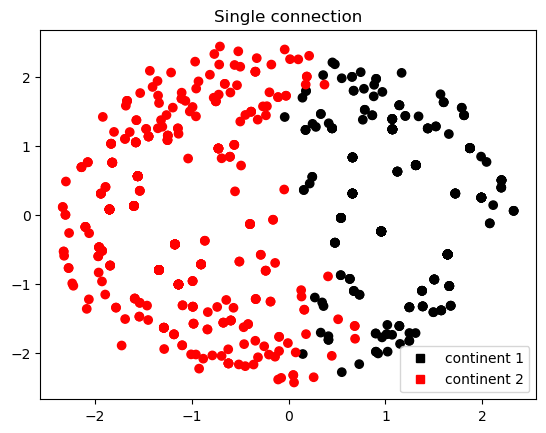

In [52]:
continent_colors = ['black' if x in [0,1,2,3] else 'red' for x in data["subpop_id"]]
plt.scatter(npos[:,0], npos[:,1], color=continent_colors)

continent1 = mlines.Line2D([], [], color='black', marker='s', ls='', label='continent 1')
continent2 = mlines.Line2D([], [], color='red', marker='s', ls='', label='continent 2')

plt.legend(handles=[continent1, continent2])

plt.title("Single connection")
plt.savefig("mds_continent.png")

In [53]:
npos

array([[ 0.65961672,  0.30936826],
       [ 1.02018246, -1.59119639],
       [ 1.64288642, -0.57185295],
       ...,
       [-0.59698376, -1.52742424],
       [-0.33959925, -1.2170904 ],
       [-1.55914862,  0.55978404]])